<a href="https://colab.research.google.com/github/TiNkErBeLlTaNyA/Movie_Data_Analysis/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Report on TMDB Movies dataset**
####- **Tanya Agarwal**




##Table of contents
- Introduction
- Data Wrangling
- Exploratory Data
- Conclusion

## **Introduction**
TMDB movie dataset contains information about collection movies including user rating and revenue.

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

In [ ]:
# uploading one csv file on colab
from google.colab import files
uploaded = files.upload()

Saving tmdb-movies.csv to tmdb-movies.csv


##** Data Wrangling**
 - Loading the dataset
 - Exploring the data general properties
 - Trim and clean the dataset

In [ ]:
#Loading the given dataset and displaying 1st 2 rows
df_movie = pd.read_csv('tmdb-movies.csv',sep = ',')

In [ ]:
#Displaying first few rows of the dataset.
df_movie.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [ ]:
#Display dimension of dataset
df_movie.shape

(10866, 21)

In [ ]:
#displays a summary of the dataset
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [ ]:
#Displays the statistics summary for numerical columns of datasat
df_movie.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


## **Data Cleaning**

- Checking null values
- Checking duplicate values
- Droping null and duplicate values

In [ ]:
# Calculating the number of missing values in dataset
df_movie.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [ ]:
df_movie = df_movie.dropna()

In [ ]:
df_movie.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [ ]:
#Checking if there is any duplicated value in our dataset
df_movie.duplicated().sum()

0

In [ ]:
#dropping duplicated rows from dataset
df_movie.drop_duplicates(inplace = True)
df_movie.shape

(1992, 21)

In [ ]:
df_movie.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [ ]:
#Displaying the columns name of dataset
df_movie.columns.values

array(['id', 'imdb_id', 'popularity', 'budget', 'revenue',
       'original_title', 'cast', 'homepage', 'director', 'tagline',
       'keywords', 'overview', 'runtime', 'genres',
       'production_companies', 'release_date', 'vote_count',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj'],
      dtype=object)

###Changing date fromat

In [ ]:
df_movie['release_date']=pd.to_datetime(df_movie['release_date'])
df_movie['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

##**Exploration of dataset**
Which year has the highest release of movies

In [ ]:
#counting the number of movies in each year
df_year=df_movie.groupby('release_year').count()['id']
df_year

release_year
1961      1
1962      1
1963      1
1964      2
1965      1
1967      1
1969      1
1970      1
1971      4
1972      1
1973      2
1974      2
1975      3
1976      2
1977      3
1978      4
1979      5
1980      2
1981      6
1982      3
1983      6
1984      5
1985      4
1986      2
1987      8
1988      4
1989      5
1990      6
1991      3
1992      5
1993     10
1994      8
1995     10
1996     15
1997     11
1998     13
1999     24
2000     20
2001     19
2002     31
2003     40
2004     48
2005     72
2006     92
2007    135
2008    142
2009    192
2010    206
2011    219
2012    145
2013    128
2014    153
2015    165
Name: id, dtype: int64

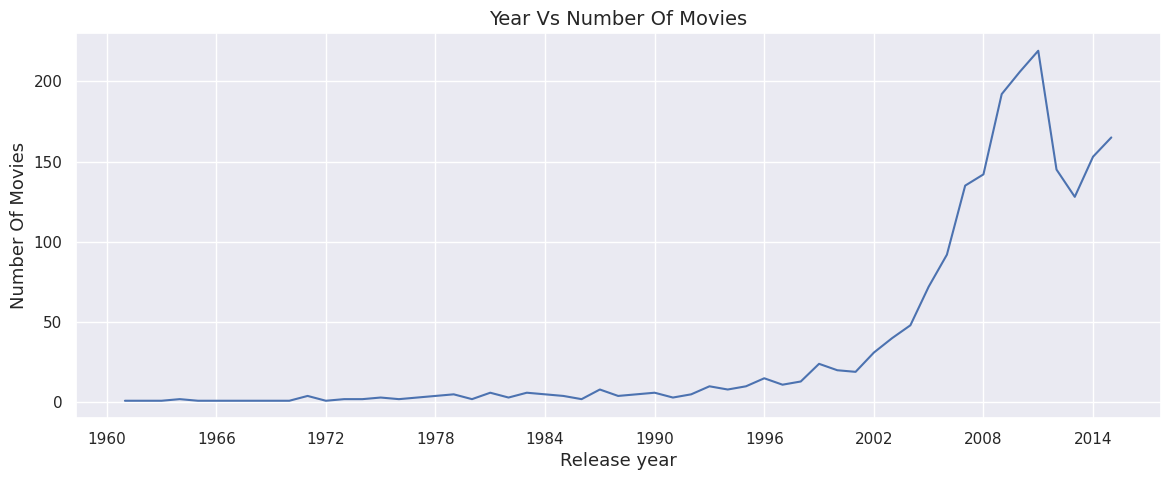

In [ ]:
df_year.plot(xticks = np.arange(1960,2016,6))
sns.set(rc={'figure.figsize':(14,5)})
plt.title("Year Vs Number Of Movies",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Number Of Movies',fontsize = 13)
#set the style sheet
sns.set_style("darkgrid")

From the plot we can see that year 2014 has highest release of movies i.e., 700

Now we can search which month has got highest release of movies after year


In [ ]:
df_month=df_movie['release_date'].dt.month.value_counts().sort_index()
df_month

1     149
2     122
3     151
4     137
5     158
6     157
7     153
8     153
9     290
10    201
11    146
12    175
Name: release_date, dtype: int64

Text(0, 0.5, 'Number of movie releases')

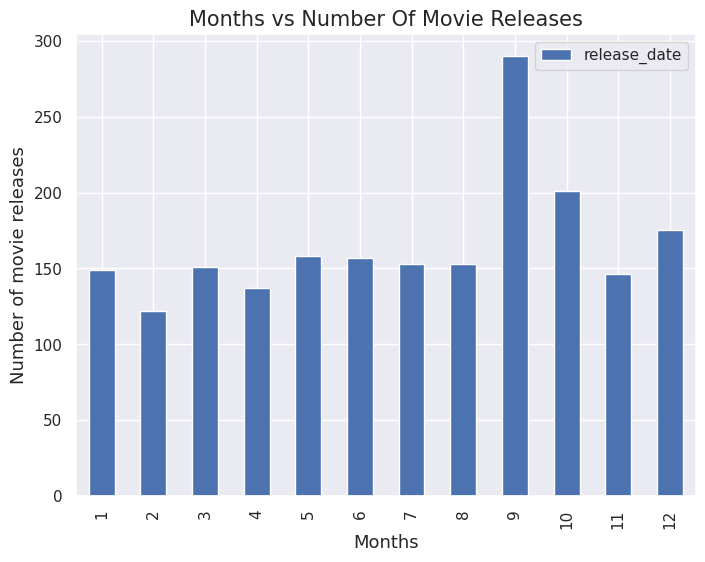

In [ ]:
months=['1','2','3','4','5','6','7','8','9','10','11','12']
df_month = pd.DataFrame(df_month)
df_month['month'] = months

df_month.plot(x='month',kind='bar',fontsize = 11,figsize=(8,6))
plt.title('Months vs Number Of Movie Releases',fontsize = 15)
plt.xlabel('Months',fontsize = 13)
plt.ylabel('Number of movie releases',fontsize = 13)

From the above plot we can say month 9 and 10 has highest number of movie release.

which types of genre are more popular in the movies

In [ ]:
df_movie.genres.nunique()

682

As there are total 682 genres we can take only Top 10 popular genres.

In [ ]:
movie = df_movie.genres.value_counts().head(10)
movie

Drama                   127
Comedy                  105
Drama|Romance            52
Documentary              51
Horror|Thriller          50
Comedy|Drama             46
Comedy|Romance           45
Comedy|Drama|Romance     42
Horror                   30
Drama|Thriller           28
Name: genres, dtype: int64

Text(0.5, 1.0, 'All Top 10 Genres ')

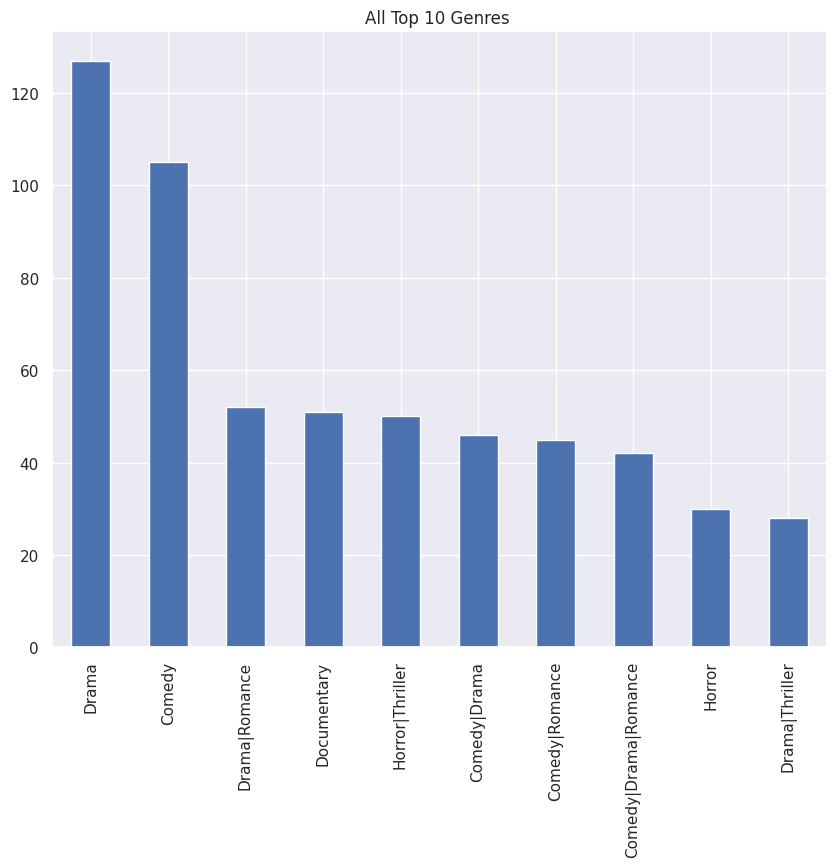

In [ ]:
top_10 = movie
top_10.plot(kind='bar',figsize=(10,8))
plt.title('All Top 10 Genres ')

Above Graph just explains that Genre which is popular in movies is Drama.


In [ ]:
df_movie.sample(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1487,8373,tt1055369,0.813323,150000000,836297228,Transformers: Revenge of the Fallen,Shia LaBeouf|Megan Fox|Josh Duhamel|Rainn Wils...,http://www.transformersmovie.com/,Michael Bay,Revenge is coming,...,Sam Witwicky leaves the Autobots behind for a ...,150,Science Fiction|Action|Adventure,Paramount Pictures|DreamWorks SKG|Amblin Enter...,2009-06-19,2230,6.0,2009,1.524601e+08,8.500129e+08


In [ ]:
df_rea = df_movie.release_year.sort_values()
df_rea

10131    1961
9849     1962
10438    1963
9884     1964
9881     1964
         ... 
214      2015
212      2015
208      2015
201      2015
0        2015
Name: release_year, Length: 1992, dtype: int64

<Axes: >

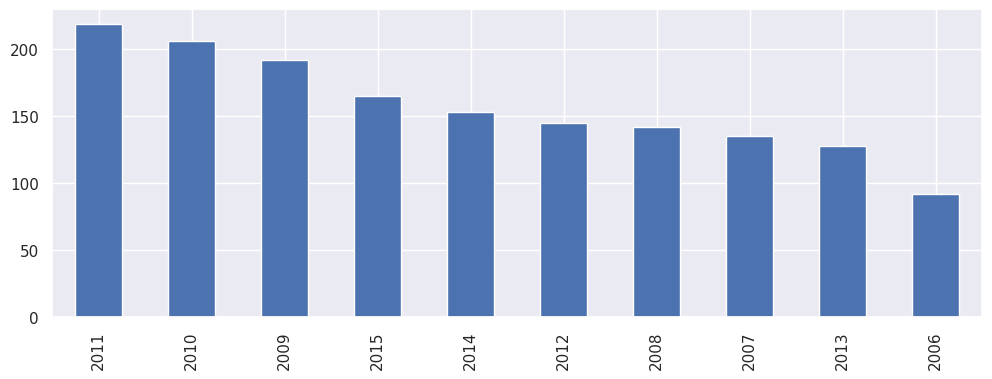

In [ ]:
df_movie['release_year'].value_counts().head(10).plot.bar(figsize=(12,4))

In [ ]:
#def data(x):
 #   data_plot = df_movie[x].str.cat(sep = '|')
  #  data = pd.Series(data_plot.split('|'))
   # info = data.value_counts(ascending=False)


In [ ]:
#df_genre = data('genres')
#print(df_genre)

According to Runtime we can find  popularity of movies

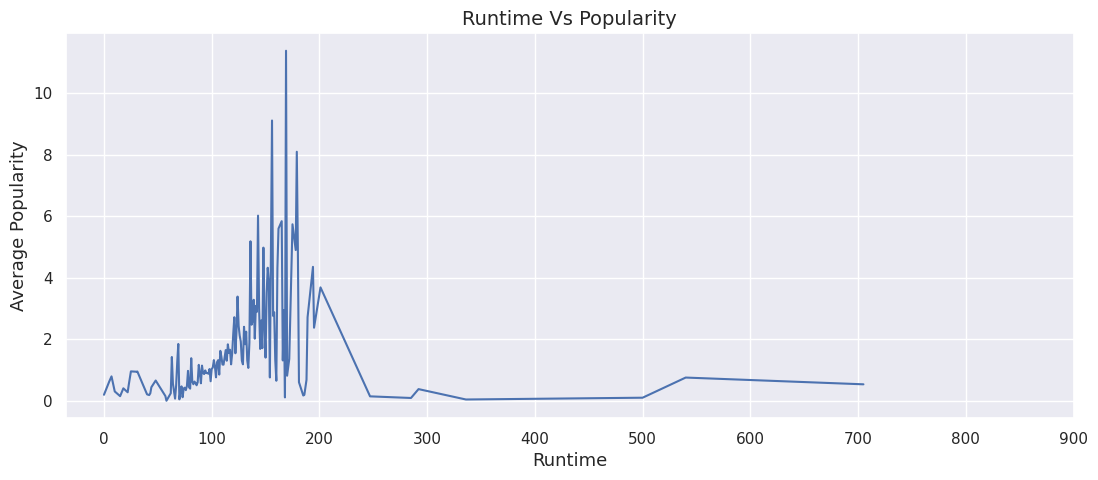

In [ ]:
df_movie.groupby('runtime')['popularity'].mean().plot(figsize = (13,5),xticks=np.arange(0,1000,100))

plt.title("Runtime Vs Popularity",fontsize = 14)
plt.xlabel('Runtime',fontsize = 13)
plt.ylabel('Average Popularity',fontsize = 13)

sns.set(rc={'figure.figsize':(15,8)})
sns.set_style("whitegrid")

From the plot we can see that movie from 150 to 200 runtime are popular i.e., short duration runtime movies are more popular from the dataset

## **Conclusion**

Year 2014 year has the highest release of movies (700) followed by year 2013 (659) and year 2015 (629).
The higher number of release in september and october month.
We can say that movies in the range of 100-200 runtime are more popular than other runtime movies.

We can find more about this data that is about profit of movies dependent on there popularities, than each movie budget, revenue and so on.